In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline 

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

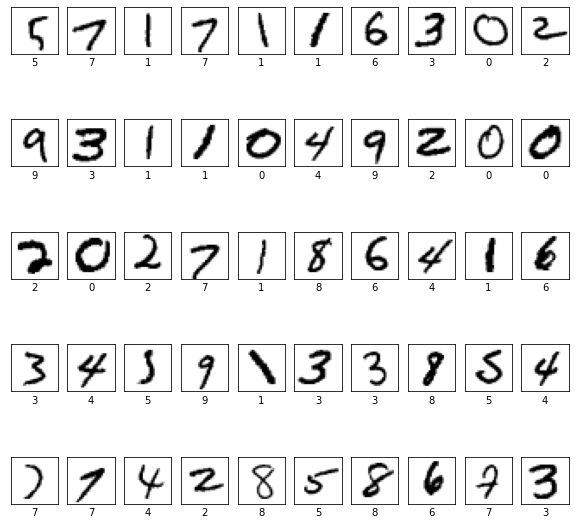

In [4]:
plt.figure(figsize=(10,10))
for i in range(100,150):
    plt.subplot(5,10,i-100+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i]])

In [5]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [6]:
x_train = x_train / 255 
x_test = x_test / 255

In [7]:
n = 0

In [8]:
print(y_train[n])

5


In [9]:
y_train = utils.to_categorical(y_train, 10)

In [10]:
y_test = utils.to_categorical(y_test, 10)

In [11]:
print(y_train[n])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [12]:
# Создаем последовательную модель
model = Sequential()
# Входной полносвязный слой, 1200 нейронов, 784 входа в каждый нейрон
model.add(Dense(1200, input_dim=784, activation="relu"))
# 1 скрытый слой
model.add(Dense(800, activation="relu"))
# 2 скрытый слой
model.add(Dense(600, activation="relu"))
# Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
model.add(Dense(10, activation="softmax"))

In [13]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1200)              942000    
                                                                 
 dense_1 (Dense)             (None, 800)               960800    
                                                                 
 dense_2 (Dense)             (None, 600)               480600    
                                                                 
 dense_3 (Dense)             (None, 10)                6010      
                                                                 
Total params: 2,389,410
Trainable params: 2,389,410
Non-trainable params: 0
_________________________________________________________________
None


In [14]:
history = model.fit(x_train, y_train, 
                    batch_size=500, 
                    epochs=20,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/20
96/96 [==============================] - 6s 59ms/step - loss: 0.3068 - accuracy: 0.9068 - val_loss: 0.1197 - val_accuracy: 0.9664
Epoch 2/20
96/96 [==============================] - 6s 58ms/step - loss: 0.0898 - accuracy: 0.9726 - val_loss: 0.0999 - val_accuracy: 0.9692
Epoch 3/20
96/96 [==============================] - 6s 58ms/step - loss: 0.0550 - accuracy: 0.9828 - val_loss: 0.0908 - val_accuracy: 0.9713
Epoch 4/20
96/96 [==============================] - 6s 59ms/step - loss: 0.0341 - accuracy: 0.9892 - val_loss: 0.0892 - val_accuracy: 0.9732
Epoch 5/20
96/96 [==============================] - 6s 60ms/step - loss: 0.0242 - accuracy: 0.9923 - val_loss: 0.0907 - val_accuracy: 0.9751
Epoch 6/20
96/96 [==============================] - 6s 60ms/step - loss: 0.0216 - accuracy: 0.9928 - val_loss: 0.0800 - val_accuracy: 0.9783
Epoch 7/20
96/96 [==============================] - 7s 73ms/step - loss: 0.0148 - accuracy: 0.9953 - val_loss: 0.0952 - val_accuracy: 0.9772
Epoch 8/20
96

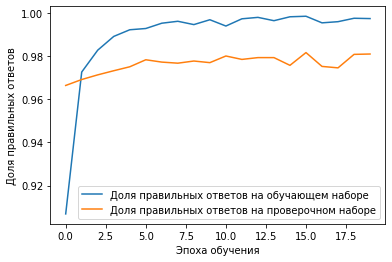

In [15]:
plt.plot(history.history['accuracy'], 
         label='Доля правильных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля правильных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля правильных ответов')
plt.legend()
plt.show()

In [16]:
model.save('mnist_dense.h5')

In [17]:
scores = model.evaluate(x_test, y_test, verbose=1)

313/313 [==============================] - 2s 5ms/step - loss: 0.0820 - accuracy: 0.9833


In [18]:
print("Доля правильных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))

Доля правильных ответов на тестовых данных, в процентах: 98.33


In [19]:
n_rec = 497

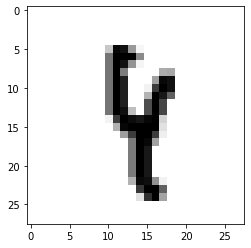

In [20]:
plt.imshow(x_test[n_rec].reshape(28, 28), cmap=plt.cm.binary)
plt.show()

In [21]:
x = x_test[n_rec]
x = np.expand_dims(x, axis=0)

In [22]:
prediction = model.predict(x)

1/1 [==============================] - 0s 66ms/step


In [23]:
prediction

array([[7.1702383e-10, 1.2715185e-05, 1.4784451e-08, 4.5274316e-11,
        9.9997711e-01, 8.0265500e-10, 6.3774910e-09, 2.1155785e-08,
        9.4863854e-06, 6.5081906e-07]], dtype=float32)

In [24]:
prediction = np.argmax(prediction[0])
print("Номер класса:", prediction)
print("Название класса:", classes[prediction])

Номер класса: 4
Название класса: 4


In [25]:
label = np.argmax(y_test[n_rec])
print("Номер класса:", label)
print("Название класса:", classes[label])

Номер класса: 4
Название класса: 4
